Test de la Chi-Cuadrado
Si seleccionas líneas de la transcripción en esta sección, irás a la marca de tiempo en el vídeo
Vamos a ver en este vídeo un ejemplo práctico de cómo realizar el famosísimo test de 'x' cuadrado, que supuso una revolución al permitir un criterio sólido para encontrar relaciones entre variables cualitativas usando las tablas de contingencia. El fundamento de este test es comparar la suma de diferencias al cuadrado entre lo que estamos observando, es decir, nuestros datos reales, y aquello que cabría esperar en una situación donde no existe ninguna relación entre variables. Esto permite cuantificar la magnitud de todas estas distancias, compararlas con una distribución, que es la de 'x' cuadrado, y decidir si podemos afirmar que estas variables están relacionadas significativamente.

Una de las debilidades de este test es que no permite cuantificar cada una de las relaciones entre categorías, pero permite afirmaciones globales del tipo: "fumar está relacionado significativamente con el cáncer de pulmón". Y, aun así, una exploración visual de las tablas permite determinar en qué dirección se da esta relación.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/lquito/Desktop/datasets/base_datos_2008.csv")

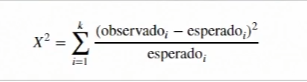

In [2]:
np.random.seed(0)
df = df[df["Origin"].isin(["HOU", "ATL", "IND"])]
df = df.sample(frac=1)
df = df[0:10000]

In [3]:
df["BigDelay"] = df["ArrDelay"] > 30 
observados = pd.crosstab(index=df['BigDelay'], columns=df['Origin'], margins=True)

In [4]:
observados

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,6927,883,765,8575
True,1197,129,99,1425
All,8124,1012,864,10000


In [5]:
from scipy.stats import chi2_contingency

In [7]:
test = chi2_contingency(observados)

In [8]:
test

Chi2ContingencyResult(statistic=8.939538453043031, pvalue=0.17700704816414425, dof=6, expected_freq=array([[ 6966.33,   867.79,   740.88,  8575.  ],
       [ 1157.67,   144.21,   123.12,  1425.  ],
       [ 8124.  ,  1012.  ,   864.  , 10000.  ]]))

In [9]:
esperados = pd.DataFrame(test[3])

In [10]:
esperados

,0,1,2,3
0,6966.33,867.79,740.88,8575.0
1,1157.67,144.21,123.12,1425.0
2,8124.00,1012.00,864.00,10000.0


In [11]:
esperados_rel = round(esperados.apply(lambda r: r/len(df) *100,axis=1),2)

In [13]:
observados_rel = round(observados.apply(lambda r: r/len(df) * 100, axis=1),2)

In [14]:
observados_rel

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,69.27,8.83,7.65,85.75
True,11.97,1.29,0.99,14.25
All,81.24,10.12,8.64,100.00


In [17]:
esperados_rel

,0,1,2,3
0,69.66,8.68,7.41,85.75
1,11.58,1.44,1.23,14.25
2,81.24,10.12,8.64,100.00


test[1]

Resumen de test de hipótesis
- Si el valor < 0.05, hay diferencias significativas: Hay relación entre variables.
- Si el valor > 0.05, no hay diferencias significativas: No hay relación entre las variables.